In [ ]:
# link unduh dataset https://www.kaggle.com/zarajamshaid/language-identification-datasst/

import pandas as pd
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
# hanya mengambil 5 kelas bahasa

df_english = df[df.language == 'English']
df_portugese = df[df.language == 'Portugese']
df_french = df[df.language == 'French']
df_spanish = df[df.language == 'Spanish']
df_indonesian = df[df.language == 'Indonesian']

df = pd.concat([df_english, df_portugese, df_french, df_spanish, df_indonesian])

In [ ]:
# proses one-hot-encoding

category = pd.get_dummies(df.language)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='language')
df_baru

,Text,English,French,Indonesian,Portugese,Spanish
37,in johnson was awarded an american institute ...,1,0,0,0,0
40,bussy-saint-georges has built its identity on ...,1,0,0,0,0
76,minnesotas state parks are spread across the s...,1,0,0,0,0
90,nordahl road is a station served by north coun...,1,0,0,0,0
97,a talk by takis fotopoulos about the internati...,1,0,0,0,0
...,...,...,...,...,...,...
21906,walaupun pada mulanya berhasil menurunkan ting...,0,0,1,0,0
21912,namun dalam usia hari akhirnya meninggal duni...,0,0,1,0,0
21922,dewan wali terlibat dalam proses legislasi den...,0,0,1,0,0
21954,ordo ekuestrian makam kudus yerusalem bahasa l...,0,0,1,0,0


In [ ]:
# mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

teks = df_baru['Text'].values
label = df_baru[['English', 'French', 'Indonesian', 'Portugese', 'Spanish']].values

In [ ]:
# membagi data untuk training dan data untuk testing.

from sklearn.model_selection import train_test_split

teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [ ]:
# tokenisasi dan padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
# menetukan layer dan compile

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss=tf.keras.losses.KLDivergence(), optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [ ]:
# melatih model

num_epochs = 30
history = model.fit(padded_latih, label_latih, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2)

Epoch 1/30
125/125 - 13s - loss: 1.0847 - accuracy: 0.5045 - val_loss: 0.5586 - val_accuracy: 0.7710
Epoch 2/30
125/125 - 14s - loss: 0.3664 - accuracy: 0.8440 - val_loss: 0.1508 - val_accuracy: 0.9700
Epoch 3/30
125/125 - 14s - loss: 0.1252 - accuracy: 0.9645 - val_loss: 0.0758 - val_accuracy: 0.9750
Epoch 4/30
125/125 - 14s - loss: 0.0801 - accuracy: 0.9787 - val_loss: 0.0539 - val_accuracy: 0.9830
Epoch 5/30
125/125 - 14s - loss: 0.0642 - accuracy: 0.9860 - val_loss: 0.0511 - val_accuracy: 0.9820
Epoch 6/30
125/125 - 15s - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 7/30
125/125 - 14s - loss: 0.0347 - accuracy: 0.9900 - val_loss: 0.0407 - val_accuracy: 0.9840
Epoch 8/30
125/125 - 14s - loss: 0.0259 - accuracy: 0.9930 - val_loss: 0.0515 - val_accuracy: 0.9810
Epoch 9/30
125/125 - 14s - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.0424 - val_accuracy: 0.9870
Epoch 10/30
125/125 - 14s - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0430 - val_accura

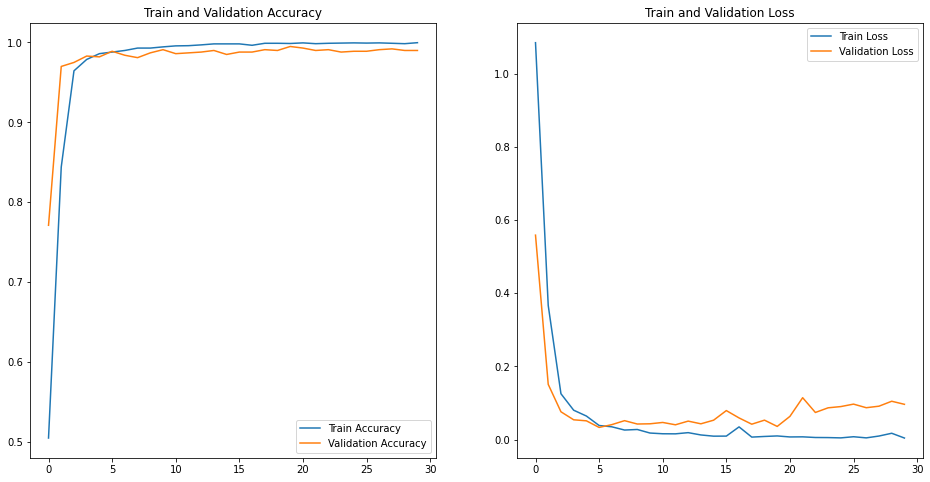

In [ ]:
# membuat plot loss dan accuracy

import numpy as np
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range, acc, label='Train Accuracy')
plt.plot(range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range, loss, label='Train Loss')
plt.plot(range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')
plt.show()